                                 PROJET 3 
           Concevez une application au service de la santé publique

# I - Chargement des packages

In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import os

from Description import *

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
print('Version des librairies utilisées :') 
!python --version
print('Pandas',pd.__version__)
print('NumPy',np.version.full_version)
print('Matplotlib',mpl.__version__)
print('Seaborn',sb.__version__)
print('Sklearn',sklearn.__version__)

Version des librairies utilisées :
Python 3.9.16
Pandas 1.5.3
NumPy 1.23.5
Matplotlib 3.7.0
Seaborn 0.12.2
Sklearn 1.2.1


# II - Chargement du jeu de données

In [3]:
# Importation du jeu de données
data = pd.read_csv('/Users/Leila/Documents/OpenClassRooms/P3/fr.openfoodfacts.org.products.csv', sep='\t',na_values=['NaT','nan'],low_memory=False)
datafood = data.copy()
pd.options.display.max_columns = None
datafood.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

# III - Structure du jeu de données

In [4]:
Jeudedonnée(datafood)


            Structure du jeu de données 

Nombre d observations        :  320772
Nombre de variables          :  162
Nombre de valeurs manquantes :  39608589
Taux de valeurs manquantes   :  76.22 %
Nombre de valeurs dupliquées :  0
Taux de valeurs dupliquées   :  0.0 %


Nombre de types de variable :
float64    106
object      56
dtype: int64 



<Axes: >

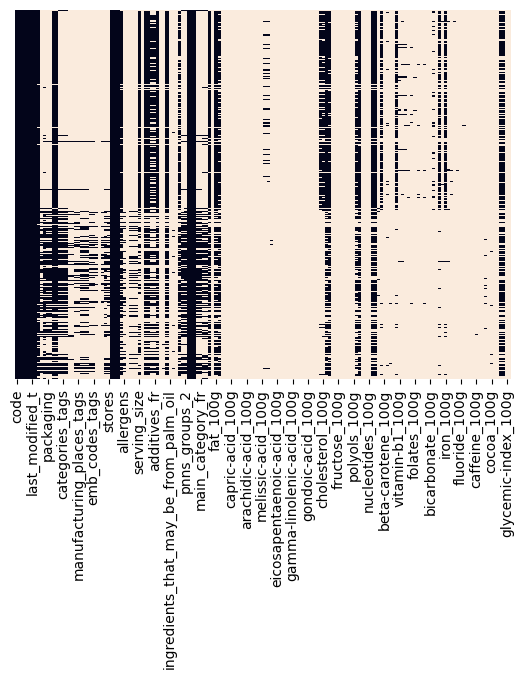

In [5]:
sb.heatmap(datafood.isnull(), yticklabels=False, cbar=False )

# IV - Structure du jeu de données après le pré-nettoyage

In [6]:
Jeudedonnéepréclean(datafood)


      Structure du jeu de données après le pré-nettoyage

......Suppression de colonnes avec que des valeurs manquantes...... 
......Suppression de lignes avec que des valeurs manquantes...... 


......Suppression des colonnes à plus de 90% de valeurs manquantes...... 

Nombre d observations        :  320772
Nombre de variables          :  62
Nombre de valeurs manquantes :  7961987
Taux de valeurs manquantes   :  40.03 %
Nombre de valeurs dupliquées :  0
Taux de valeurs dupliquées   :  0.0 %


Nombre de types de variable :
object     42
float64    20
dtype: int64 



<Axes: >

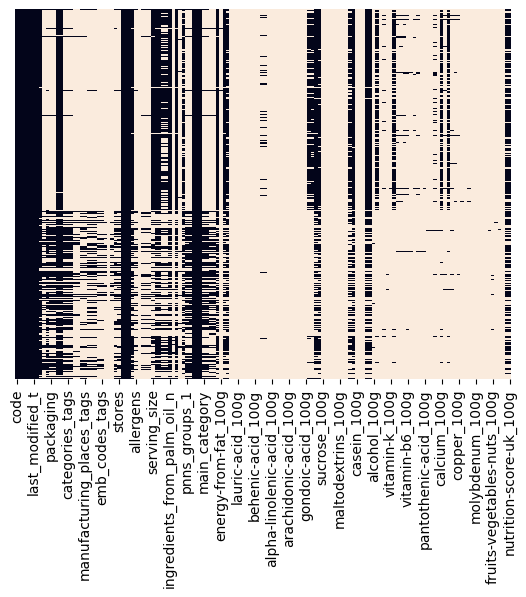

In [7]:
sb.heatmap(datafood.isnull(), yticklabels=False, cbar=False )

# V - Sélection de données pertinentes pour l'application

In [8]:
Selectdatafood=datafood.iloc[:,[7,9,12,16,33,40,49,59,61,62,88,89,99,103]]
Selectdatafood.rename(columns = {'energy_100g': 'energy_kJ'}, inplace= True)
Selectdatafood.head()
#7,9,12,16,33,40,49,59,61,62,87,88,98,102
#Select = datafood["product_name","quantity","brands","categories","countries_fr","serving_size","nutrition_grade_fr","energy_100g","carbohydrates_100g","sugars_100g","fat_100g","saturated-fat_100g","proteins_100g","salt_100g"]

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/3714731580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.rename(columns = {'energy_100g': 'energy_kJ'}, inplace= True)


,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,États-Unis,28 g (1 ONZ),d,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000
2,Peanuts,NaN,Torn & Glasser,NaN,États-Unis,28 g (0.25 cup),b,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500
3,Organic Salted Nut Mix,NaN,Grizzlies,NaN,États-Unis,28 g (0.25 cup),d,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428
4,Organic Polenta,NaN,Bob's Red Mill,NaN,États-Unis,35 g (0.25 cup),NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN


In [9]:
Jeudedonnée(Selectdatafood)


            Structure du jeu de données 

Nombre d observations        :  320772
Nombre de variables          :  14
Nombre de valeurs manquantes :  1214626
Taux de valeurs manquantes   :  27.05 %
Nombre de valeurs dupliquées :  19368
Taux de valeurs dupliquées   :  0.43 %


Nombre de types de variable :
object     7
float64    7
dtype: int64 



<Axes: >

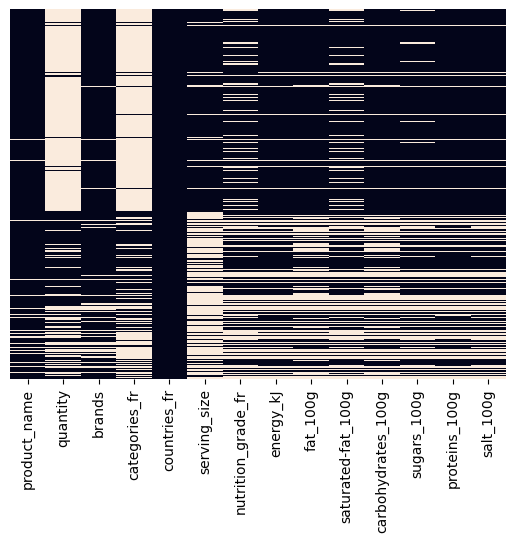

In [10]:
sb.heatmap(Selectdatafood.isnull(), yticklabels=False, cbar=False )

In [11]:
Jeudedonnéepréclean(Selectdatafood)

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',axis=1,inplace=True)
/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',inplace=True)



      Structure du jeu de données après le pré-nettoyage

......Suppression de colonnes avec que des valeurs manquantes...... 
......Suppression de lignes avec que des valeurs manquantes...... 


......Suppression des colonnes à plus de 90% de valeurs manquantes...... 

Nombre d observations        :  320734
Nombre de variables          :  14
Nombre de valeurs manquantes :  1214094
Taux de valeurs manquantes   :  27.04 %
Nombre de valeurs dupliquées :  19331
Taux de valeurs dupliquées   :  0.43 %


Nombre de types de variable :
object     7
float64    7
dtype: int64 



<Axes: >

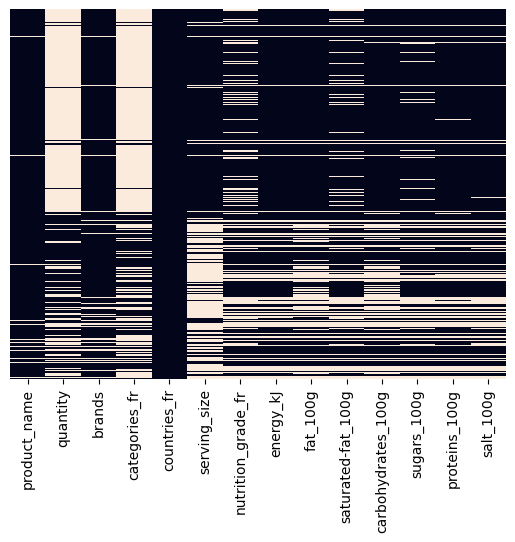

In [12]:
sb.heatmap(Selectdatafood.isnull(), yticklabels=False, cbar=False )

# VI - Nettoyage du jeu de données

## 1. Traitement des doublons

In [13]:
suppDoublons(Selectdatafood)

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suppdoub=data.drop_duplicates(keep='first',inplace=True)



           Traitement des doublons


Taille du jeu de données avant:  320734 , 14

Nombre de valeurs manquantes :  1214094

Identification des doublons  :  19331

 ......Suppression des doublons sauf la première ligne...... 

Taille du jeu de données après:  301403 , 14 

Nombre de valeurs manquantes :  1027136 



## 2. Détection de valeurs aberrantes

### A. Visualisation des données

In [14]:
def boxplot(data):
    plt.figure(figsize = (8,6))
    sb.boxplot(data=data,orient="h")
    plt.grid()

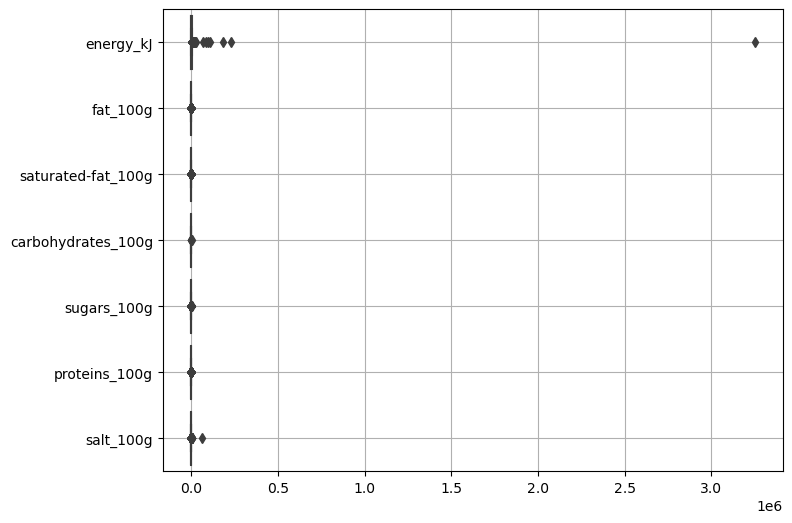

In [15]:
boxplot(Selectdatafood)

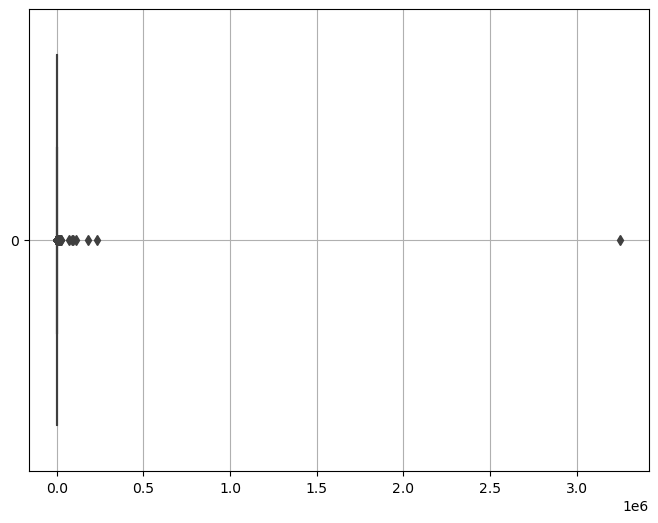

In [16]:
boxplot(Selectdatafood['energy_kJ'])

### B. Extraction des colonnes à traiter

In [17]:
features=['energy_kJ','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']
featuress=['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']

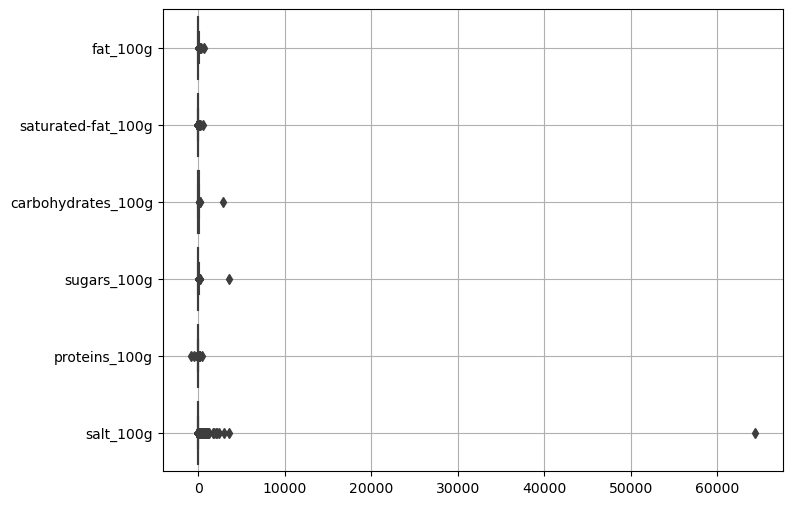

In [18]:
boxplot(Selectdatafood[featuress])

### C. Dispersions des variables quantitatives

In [19]:
Selectdatafood.describe().round()

,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,255030.0,237826.0,224834.0,237524.0,239659.0,253848.0,249457.0
mean,1143.0,13.0,5.0,32.0,16.0,7.0,2.0
std,6522.0,17.0,8.0,30.0,22.0,8.0,130.0
min,0.0,0.0,0.0,0.0,-18.0,-800.0,0.0
25%,381.0,0.0,0.0,6.0,1.0,1.0,0.0
50%,1100.0,5.0,2.0,21.0,6.0,5.0,1.0
75%,1674.0,20.0,7.0,58.0,24.0,10.0,1.0
max,3251373.0,714.0,550.0,2917.0,3520.0,430.0,64313.0


### D. Suppression des lignes contenant des valeurs aberrantes

#### 1 - Suppression des valeurs négatives et valeurs supérieures à 100g

In [20]:
def intervalle(data,feature):
    for feature in feature:
        data.drop(data[data[feature] < 0 ].index, inplace=True)
        data.drop(data[data[feature] > 100 ].index, inplace=True)

In [21]:
intervalle(Selectdatafood,featuress)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/4203142395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data[feature] < 0 ].index, inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/4203142395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data[feature] > 100 ].index, inplace=True)


#### 2 - Suppression des valeurs de classification nutritives erronées 

In [22]:
Selectdatafood[Selectdatafood['carbohydrates_100g'] < Selectdatafood['sugars_100g']]

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
379,Dried Honey Crisp Apples,NaN,Welch's,NaN,États-Unis,40 g (0.25 cup),c,1255.0,0.00,0.00,72.50,75.00,0.00,0.00000
1509,"Muchacha, Salsa, Mild",NaN,Penguin Software Inc,NaN,États-Unis,28 g (2 Tbsp),c,297.0,5.36,0.00,3.57,7.14,0.00,0.68072
1510,"Muchacha, Medium Salsa",NaN,Penguin Software Inc,NaN,États-Unis,28 g (2 Tbsp),c,297.0,5.36,0.00,3.57,7.14,0.00,0.68072
1511,"Muchacho, Hot Salsa, Hot",NaN,Penguin Software Inc,NaN,États-Unis,28 g (2 Tbsp),c,297.0,5.36,0.00,3.57,7.14,0.00,0.68072
2079,Creamy Tomato Bisque,NaN,Wholesome@Home,NaN,États-Unis,245 g (1 cup),c,460.0,8.98,4.08,5.71,6.12,1.63,0.73660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317748,"Sambal Kecap Sweet Soy Chili Sauce, Hot",NaN,Cap Ibu Mother Brand,NaN,États-Unis,10 g (10 GRM),e,1674.0,30.00,0.00,20.00,80.00,20.00,3.73380
318961,Deep Spring Orange & Passionfruit,1.25L,"Deep Spring,Coca-Cola Amatil","Boissons,Eaux,Eaux minérales,Boissons non sucr...",Australie,250 ml,a,38.4,0.40,0.00,2.00,2.16,0.40,0.00965
320075,"Hank's, Jam, Raspberry",NaN,Hank's Brands Pty Ltd.,NaN,États-Unis,25 g (25 GRM),d,849.0,0.00,0.00,46.80,62.40,2.00,0.02032
320137,Organic Lightly Sparkling Blood Orange,NaN,Parker's,NaN,États-Unis,330 ml (1 BOTTLE),b,155.0,0.00,0.00,8.48,9.09,0.61,0.01524


In [23]:
Selectdatafood[Selectdatafood['fat_100g'] < Selectdatafood['saturated-fat_100g']]

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
2322,Dried Cranberries,NaN,"Simple Truth Organic, The Kroger Co.",NaN,États-Unis,40 g (0.25 cup),c,1255.0,0.00,1.25,82.50,65.00,0.00,0.00000
3450,"Parfait, Strawberry, Orange, Grape",NaN,Psst,NaN,États-Unis,99 g (1 cup),NaN,NaN,1.31,1.62,0.00,NaN,NaN,0.06096
5839,Iced Brownies,NaN,Roundy's,NaN,États-Unis,38 g (38 GRM),e,1322.0,9.21,21.05,60.53,47.37,2.63,0.43434
5840,Easter Pink Frosted Brownies,NaN,Roundy's,NaN,États-Unis,38 g (1.35 ONZ),e,1322.0,9.21,21.05,60.53,47.37,2.63,0.43434
6320,Tzatziki Sauce,NaN,Roundy's,NaN,États-Unis,28 g (28 GRM),c,448.0,1.79,5.36,7.14,0.00,3.57,1.04394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316996,Crème De Coco Uht AROY-D 1L,NaN,"Aroy d, Thai Agri Foods Public Company Limited",NaN,"France,États-Unis",90 g (0.5 cup),d,774.0,18.89,19.00,2.22,20.00,16.00,0.05000
317148,sweet sour sauce thai pride,200ml,thai pride,"Epicerie,Sauces,Sauces pimentées",France,NaN,NaN,194.0,0.00,2.00,11.00,8.50,NaN,0.75438
317432,Mahi Burgers,NaN,Caribbean,NaN,États-Unis,113 g (4 ONZ),c,368.0,0.88,4.42,5.31,1.77,15.93,0.89916
317655,Bot Rieng Galangal Powder,NaN,Peacock Brand,NaN,États-Unis,5 g (5 GRM),c,1674.0,0.00,20.00,40.00,0.00,0.00,0.00000


In [24]:
Selectdatafood.shape

(301220, 14)

In [25]:
Selectdatafood.drop(Selectdatafood[Selectdatafood['carbohydrates_100g'] < Selectdatafood['sugars_100g']].index, inplace=True)
Selectdatafood.drop(Selectdatafood[Selectdatafood['fat_100g'] < Selectdatafood['saturated-fat_100g']].index, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2766312759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['carbohydrates_100g'] < Selectdatafood['sugars_100g']].index, inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2766312759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['fat_100g'] < Selectdatafood['saturated-fat_100g']].index, inplace=True)


In [26]:
Selectdatafood.shape

(300208, 14)

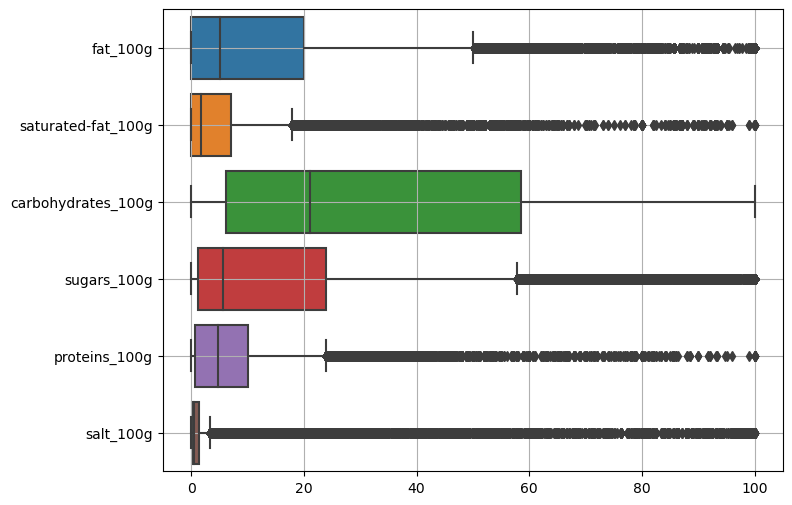

In [27]:
boxplot(Selectdatafood[featuress])

In [28]:
Selectdatafood.drop(Selectdatafood[Selectdatafood['energy_kJ'] > 3766 ].index, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2156176229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['energy_kJ'] > 3766 ].index, inplace=True)


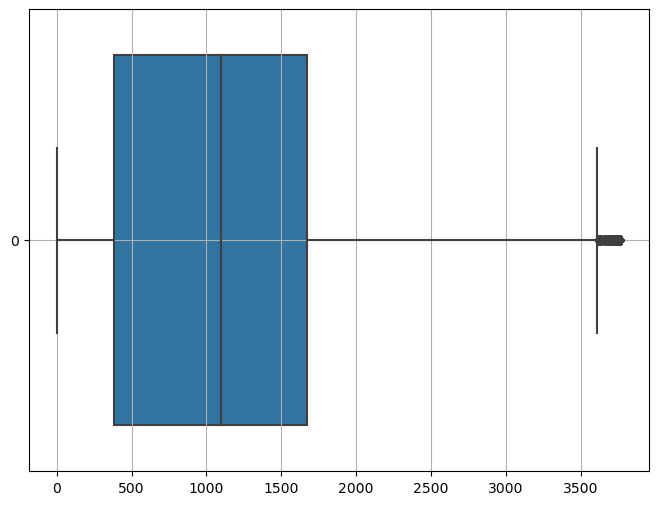

In [29]:
boxplot(Selectdatafood['energy_kJ'])

In [30]:
Selectdatafood.describe()

,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,253491.000000,236361.000000,223460.000000,236068.000000,238346.000000,252338.000000,247940.000000
mean,1122.464606,12.621494,5.081977,32.197610,15.883724,7.114011,1.587489
std,788.273196,17.108180,7.771324,29.068611,21.025690,8.132354,6.211484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,381.000000,0.000000,0.000000,6.170000,1.300000,0.710000,0.063500
50%,1100.000000,5.100000,1.790000,21.125000,5.650000,4.810000,0.589280
75%,1674.000000,20.000000,7.140000,58.500000,23.940000,10.000000,1.376680
max,3766.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 3. Gestion des valeurs manquantes

### A) Identification des valeurs manquantes

In [31]:
valmanquantes(Selectdatafood)

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',axis=1,inplace=True)



Taille du jeu de données avant:  299851 , 14

Nombres de valeurs manquantes:  1023174

Taux de valeurs manquantes:  24.37 %

Taux de valeurs manquantes par colonne: 

countries_fr           0.080040
product_name           1.584787
brands                 5.301300
energy_kJ             15.461012
proteins_100g         15.845537
salt_100g             17.312265
sugars_100g           20.511854
fat_100g              21.173850
carbohydrates_100g    21.271565
saturated-fat_100g    25.476320
nutrition_grade_fr    28.035258
serving_size          31.962208
quantity              65.212389
categories_fr         71.999093
dtype: float64

Nombres de valeurs manquantes par colonne en %: 

countries_fr             240
product_name            4752
brands                 15896
energy_kJ              46360
proteins_100g          47513
salt_100g              51911
sugars_100g            61505
fat_100g               63490
carbohydrates_100g     63783
saturated-fat_100g     76391
nutrition_grade_fr     84064

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',inplace=True)


<Axes: >

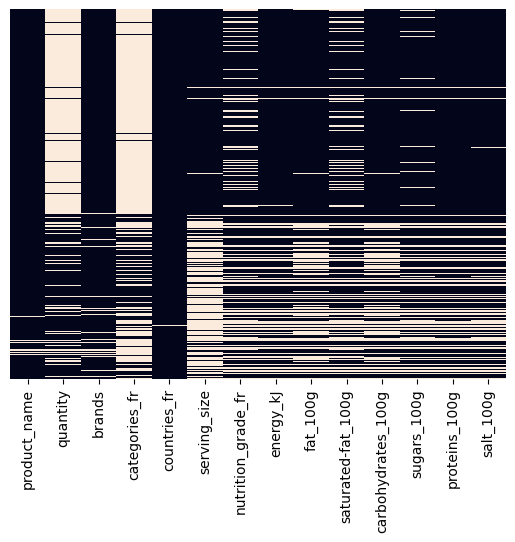

In [32]:
sb.heatmap(Selectdatafood.isnull(), yticklabels=False, cbar=False )

### B) Suppression des lignes de produits sans nom

In [33]:
Selectdatafood[Selectdatafood['product_name'].isnull()]

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
48,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,A&W,Root-bier,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,"46,7 g",NaN,"Snacks sucrés,Confiseries,Bonbons",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,Allemagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320555,NaN,NaN,"Milo,Nestlé",NaN,Singapour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320559,NaN,NaN,"Milo,Nestlé",NaN,Singapour,200 ml,b,260.0,2.25,0.9,9.5,8.0,1.7,0.0762
320688,NaN,NaN,Rexona,"Non alimentaire,Open Beauty Facts",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,NaN,33cl,NaN,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",Suisse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
Selectdatafood.drop(Selectdatafood[Selectdatafood['product_name'].isnull()].index, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2319941886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['product_name'].isnull()].index, inplace=True)


### C) Suppression des lignes pour lesquelles les informations nutritionnelles sont vides

In [35]:
Selectdatafood[(Selectdatafood['energy_kJ'].isnull()) & (Selectdatafood['fat_100g'].isnull()) & (Selectdatafood['saturated-fat_100g'].isnull()) & (Selectdatafood['carbohydrates_100g'].isnull()) & (Selectdatafood['sugars_100g'].isnull()) & (Selectdatafood['proteins_100g'].isnull()) & (Selectdatafood['salt_100g'].isnull())]

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Filet de bœuf,2.46 kg,NaN,Filet-de-boeuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Twix x2,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Flute,NaN,Waitrose,"Aliments et boissons à base de végétaux,Alimen...",Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,still Scottish water,NaN,NaN,NaN,Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320764,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,Rillette d'oie,180 g,"Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,Tomato & ricotta,1,Panzani,NaN,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,乐吧泡菜味薯片,50 g,乐吧,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
Selectdatafood.drop(Selectdatafood[(Selectdatafood['energy_kJ'].isnull()) & (Selectdatafood['fat_100g'].isnull()) & (Selectdatafood['saturated-fat_100g'].isnull()) & (Selectdatafood['carbohydrates_100g'].isnull()) & (Selectdatafood['sugars_100g'].isnull()) & (Selectdatafood['proteins_100g'].isnull()) & (Selectdatafood['salt_100g'].isnull())].index, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2440787175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[(Selectdatafood['energy_kJ'].isnull()) & (Selectdatafood['fat_100g'].isnull()) & (Selectdatafood['saturated-fat_100g'].isnull()) & (Selectdatafood['carbohydrates_100g'].isnull()) & (Selectdatafood['sugars_100g'].isnull()) & (Selectdatafood['proteins_100g'].isnull()) & (Selectdatafood['salt_100g'].isnull())].index, inplace=True)


### D) Suppression des colonnes pour lesquelles les variables sont supérieurs à 50% de NaN

In [37]:
Selectdatafood.drop(['quantity','categories_fr'], axis=1, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/84427806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(['quantity','categories_fr'], axis=1, inplace=True)


### E) Traitement des valeurs manquantes

#### 1 - Remplacer par la moyenne

In [38]:
fmean=['carbohydrates_100g','saturated-fat_100g','proteins_100g']

In [39]:
for feature in fmean:
    remplmean(Selectdatafood,feature)

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(mean,inplace=True)


#### 2 - Remplacer par la médiane

In [40]:
fmedian=['energy_kJ','fat_100g','sugars_100g']

In [41]:
for feature in fmedian:
    remplmedian(Selectdatafood,feature)

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(median,inplace=True)


#### 3 - Remplacer par 0

In [42]:
Selectdatafood['salt_100g'].fillna(0, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_1220/2756776613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood['salt_100g'].fillna(0, inplace=True)


### F) Suppression des lignes dupliquées

In [43]:
suppDoublons(Selectdatafood)


           Traitement des doublons


Taille du jeu de données avant:  251679 , 12

Nombre de valeurs manquantes :  93016

Identification des doublons  :  397

 ......Suppression des doublons sauf la première ligne...... 

Taille du jeu de données après:  251282 , 12 

Nombre de valeurs manquantes :  92757 



/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suppdoub=data.drop_duplicates(keep='first',inplace=True)


### G) Visualisation du jeu de données après traitement des valeurs manquantes

In [44]:
valmanquantes(Selectdatafood)


Taille du jeu de données avant:  251282 , 12

Nombres de valeurs manquantes:  92757

Taux de valeurs manquantes:  3.08 %

Taux de valeurs manquantes par colonne: 

product_name           0.000000
energy_kJ              0.000000
fat_100g               0.000000
saturated-fat_100g     0.000000
carbohydrates_100g     0.000000
sugars_100g            0.000000
proteins_100g          0.000000
salt_100g              0.000000
countries_fr           0.025867
brands                 1.318439
nutrition_grade_fr    15.408187
serving_size          20.161014
dtype: float64

Nombres de valeurs manquantes par colonne en %: 

product_name              0
energy_kJ                 0
fat_100g                  0
saturated-fat_100g        0
carbohydrates_100g        0
sugars_100g               0
proteins_100g             0
salt_100g                 0
countries_fr             65
brands                 3313
nutrition_grade_fr    38718
serving_size          50661
dtype: int64

......Suppression de colonnes avec 

/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',axis=1,inplace=True)
/Users/Leila/Documents/OpenClassRooms/Mes modules/Description.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',inplace=True)


<Axes: >

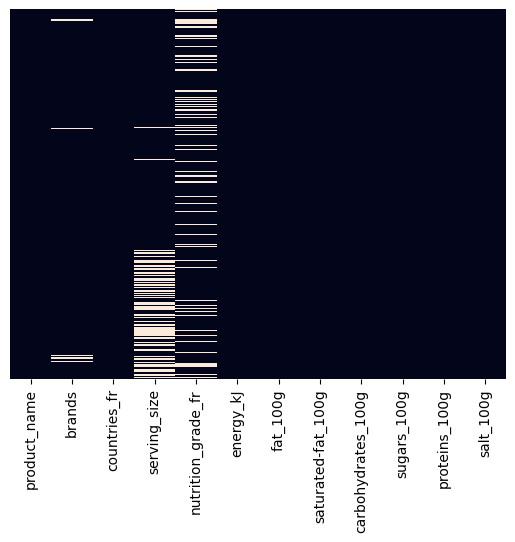

In [45]:
sb.heatmap(Selectdatafood.isnull(), yticklabels=False, cbar=False )

# VII - Conversion du jeu de données traité en CSV pour analyse

In [46]:
os.makedirs('/Users/Leila/Documents/OpenClassRooms/P3', exist_ok=True)  
Selectdatafood.to_csv('/Users/Leila/Documents/OpenClassRooms/P3/Selectdatafood.csv') 